## <span style="color:lightblue;">Sieć Neuronowa typu ***SOM***</span>
1) **Opis zbiorów danych:** należy scharakteryzować zbiory danych tak, jak omawialiśmy je na ćwiczeniach. Mile widziana wizualizacja jak w projekcie z Irysami. 2x4 pkt.

2) **Przygotowanie danych:** opis wstępnej obróbki danych i sposobu podania ich sieci/kodowania - wpływ na liczbę neuronów. Podział na zbiory: treningowy, testowy i walidujący (jak i dlaczego tak). Być może konieczne jest uwzględnienie rodzaju sieci. Jeśli tak to dlaczego, jeśli nie to dlaczego? 2x5 pkt.

3) **Struktura sieci:** przedstawić wybrane na początku konfiguracje obu sieci (dla obu problemów). Wszystkie decyzje uzasadnić. 4x4 pkt.

4) **Uczenie sieci:** wskazać wybrane algorytmy i parametry uczenia sieci. Przedstawić osiągane rezultaty. Decyzje uzasadnić. 4x4 pkt.

5) **Wyniki:** ocenić osiągnięte wyniki tj. dokładność i precyzję, złożoność i zbieżność (wykład). Tam, gdzie się da 😊 przedstawić i zinterpretować krzywą ROC. Można wykorzystać gotowe kalkulatory lub „How to Plot a ROC Curve in Python (Step-by-Step)” https://www.statology.org/plot-roc-curve-python/ 4x4 pkt.

6) **Dostrajanie parametrów:** krytyczna część prac, czyli co, czemu i jak było zmieniane, jakie dawało to efekty – dlaczego? 4x5 pkt.

7) **Podsumowanie:** na zakończenie należy podsumować otrzymane wyniki dla 4 sieci. Zestawić je parami: raz dla danych, raz dla rodzaju sieci i wyciągnąć wnioski z otrzymanych wyników. 14 pkt.

## <span style="color:royalblue;">Zbiór Danych</span>

Zbiór danych ma na celu rozróżnienie gatunków pingwinów (Adelie, Gentoo, Chinstrap) na podstawie ich cech przy pomocy sieci neuronowej SOM

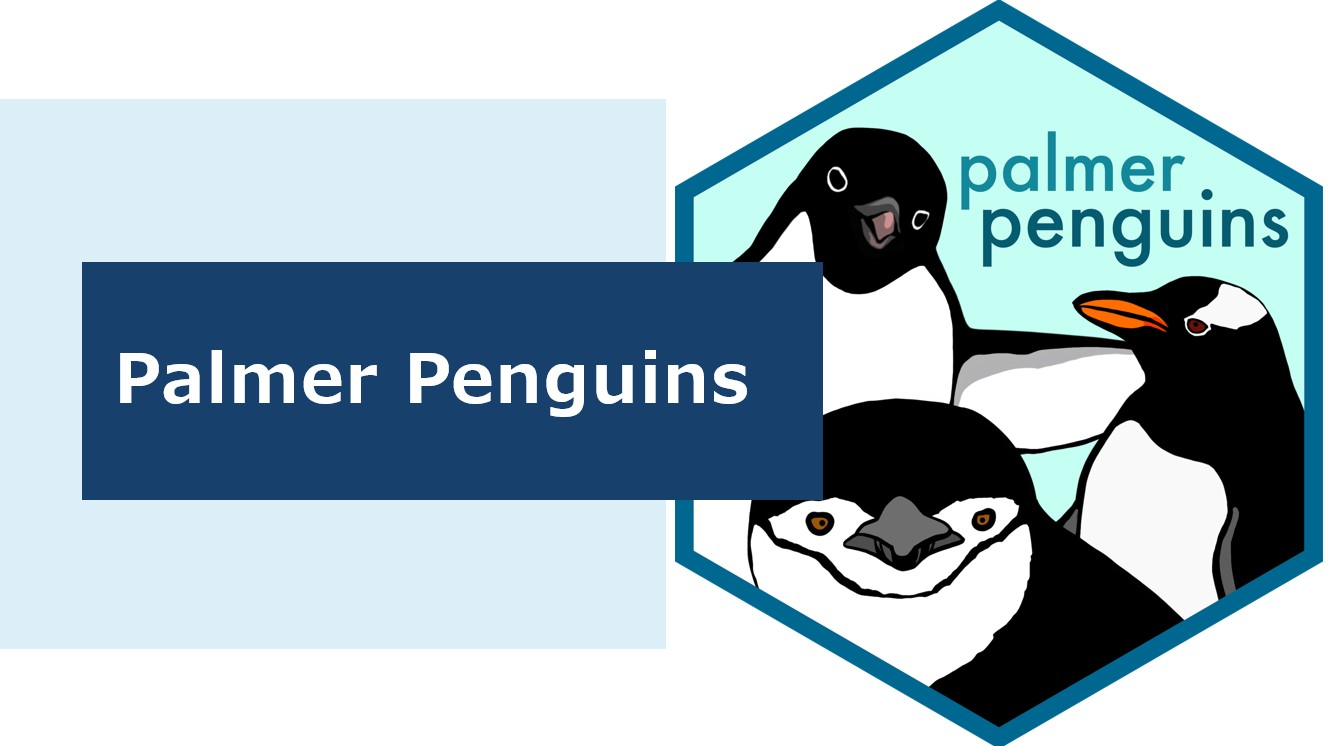

## <span style="color:royalblue;">Instalacja Bibliotek</span>
Poniżej znajdują się biblioteki, które wykorzystałam do zbudowania projektu

1) **palmerpenguins:** Biblioteka z zestawem danych o pingwinach, używana do nauki eksploracji danych.

2) **scikit-learn:** Biblioteka do uczenia maszynowego oferująca narzędzia do klasyfikacji, regresji i klasteryzacji.

3) **minisom:** MiniSom to lekka biblioteka w Pythonie umożliwiająca łatwą implementację i trening samoorganizujących się map (Self-Organizing Maps, SOM), czyli niesuperwizowanych sieci neuronowych służących do wizualizacji i klastrowania danych.

In [144]:
!pip install palmerpenguins
!pip install scikit-learn
!pip install minisom

## <span style="color:royalblue;">Importy</span>

Poniżej znajdują się moduły z bibliotek, które wykorzystałam do zbudowania projektu


1) **pandas:** Biblioteka do manipulacji i analizy danych, szczególnie przydatna do pracy z tabelami i zestawami danych.

2) **numpy**: Biblioteka do obliczeń numerycznych, umożliwiająca efektywną pracę z tablicami i operacjami matematycznymi.

3) **matplotlib.pyplot**: Moduł do tworzenia wykresów i wizualizacji danych w języku Python.

4) **palmerpenguins.load_penguins**: Funkcja dostarczająca przykładowy zbiór danych o pingwinach do analizy danych.

5) **collections.Counter**: Klasa do zliczania wystąpień elementów w iterowalnym obiekcie.

6) **minisom.MiniSom**: Implementacja samoorganizujących się map neuronowych (SOM) do analizy nienadzorowanej.

7) **sklearn.preprocessing.MinMaxScaler**: Narzędzie do skalowania danych w zadanym zakresie, zwykle między 0 a 1.

8) **sklearn.preprocessing.OneHotEncoder**: Koduje zmienne kategoryczne jako wektory binarne w formacie one-hot.

9) **sklearn.preprocessing.LabelBinarizer**: Przekształca etykiety wieloklasowe w binarne macierze wskaźników.

10) **sklearn.model_selection.train_test_split**: Funkcja do losowego podziału danych na zbiory treningowe i testowe.

11) **sklearn.metrics.classification_report**: Generuje raport podsumowujący dokładność klasyfikatora dla każdej klasy.

12) **sklearn.metrics.roc_curve**: Oblicza krzywą ROC dla klasyfikacji binarnej lub wieloklasowej.

13) **sklearn.metrics.auc**: Wyznacza pole pod krzywą ROC (AUC), mierzącą jakość klasyfikacji.

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from palmerpenguins import load_penguins
from collections import Counter
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc

## <span style="color:royalblue;">Funkcje pomocniczne tworzące wykresy i nie tylko</span>

### 1. Funkcje wizualizacyjne: ###

1) **penguins_numeric_data_plot:** Tworzy histogramy rozkładu dla cech numerycznych (np. długość dzioba, głębokość dzioba, długość płetwy) w zbiorze danych.

2) **penguins_species_count_plot:** Tworzy wykres kołowy, który pokazuje procentowy udział każdego gatunku pingwina w zbiorze danych.

3) **penguins_species_attributes_plot:** Pokazuje średnie wartości wybranych cech (np. długość dzioba, głębokość dzioba, długość płetwy) dla każdego gatunku pingwina w formie wykresu linii.

4) **penguins_species_weight_plot:** Wyświetla histogramy przedstawiające rozkład masy ciała dla różnych gatunków pingwinów.

5) **data_split_plot:** Rysuje wykres słupkowy pokazujący liczbę pingwinów w każdym gatunku w danym zbiorze danych (np. treningowym lub testowym).

6) **plot_missing_data:** Tworzy wykres słupkowy, który pokazuje liczbę brakujących danych w poszczególnych kolumnach zbioru danych.

7) **plot_roc_multiclass:** Rysuje wykresy ROC  dla wieloklasowej klasyfikacji, umożliwiając ocenę skuteczności modelu w rozróżnianiu poszczególnych klas.

8) **plot_summaru_roc_SOM:** Rysuje wykresy ROC porównujące dwa modele SOM: jeden z podstawowymi parametrami i drugi po dostrojeniu.

9) **calculateError:** Oblicza i wyświetla zmiany w błędach kwantyzacji oraz topograficznym w kolejnych iteracjach dla sieci SOM.

### 2. Funkcje klasyfikacji i podsumowania wyników: ###

1) **classify:** Klasyfikuje dane wejściowe przy użyciu sieci SOM. Działa poprzez przypisanie etykiety do neuronów na podstawie zwycięskiego neuronu dla każdego punktu danych.

2) **summary_SOM:** Wyświetla szczegółowe podsumowanie wyników działania sieci SOM.

 Działa to poprzez:
Obliczanie błędów kwantyzacji i topograficznych.
Wyświetlanie raportu klasyfikacji (precision, recall, f1-score) dla modelu.
Wizualizowanie mapy SOM (wyświetlanie odległości między neuronami).
Pokazywanie wyników klasyfikacji na mapie SOM z oznaczeniem różnych gatunków pingwinów na podstawie kolorów.

In [146]:
# Wykres rozkładu danych numerycznych dla danego datasetu
def penguins_numeric_data_plot(numeric_data, data):
  fig, axis = plt.subplots(2, 2, figsize=(10, 8))
  i = 0
  for list_axis in axis:
      for ax in list_axis:
          ax.hist(data[numeric_data[i]], bins=20, color='skyblue', edgecolor='black')
          ax.set_title(f"Rozkład {numeric_data[i]}")
          ax.set_xlabel(numeric_data[i])
          ax.set_ylabel('Liczba wystąpień')
          i += 1
  plt.tight_layout()
  plt.show()

# Wykres przedstawiający liczbę pingwinów z danego gatunku
def penguins_species_count_plot():
    species_counts = penguins["species"].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(
        species_counts.values,
        labels=species_counts.index,
        autopct="%1.1f%%",
        colors=["skyblue", "lightgreen", "salmon"],
        startangle=90,
        wedgeprops={"edgecolor": "black", "linewidth": 1}
    )
    plt.title("Procentowy udział każdego gatunku pingwinów")
    plt.show()

# Wykres przedstawiający rozkład atrybutów pingwinów z danego gatunku
def penguins_species_attributes_plot():
    species_attributes = penguins.groupby("species")[["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]].mean()
    plt.figure(figsize=(8, 5))
    for column in species_attributes.columns:
        plt.plot(species_attributes.index, species_attributes[column], marker="o", label=column)

    plt.title("Średnie wartości cech dla każdego gatunku pingwinów")
    plt.xlabel("Gatunek")
    plt.ylabel("Średnia wartość")
    plt.legend(title="Cecha", loc="upper left")
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()

# Wykres przedstawiający rozkład wagi pingwinów z danego gatunku
def penguins_species_weight_plot():
    plt.figure(figsize=(8, 5))
    for species in penguins["species"].unique():
        subset = penguins[penguins["species"] == species]
        plt.hist(
            subset["body_mass_g"],
            bins=15,
            alpha=0.5,
            label=species,
            edgecolor="black"
        )

    plt.title("Rozkład masy ciała w zależności od gatunku")
    plt.xlabel("Masa ciała (g)")
    plt.ylabel("Liczba pingwinów")
    plt.legend(title="Gatunek")
    plt.show()

# Wykres podziału danych dla danego zbioru
def data_split_plot(y, name):
    df = pd.DataFrame(y)
    species_counts = df.sum()
    species_labels = ['Chinstrap', 'Gentoo', 'Adélie']
    plt.figure(figsize=(8, 6))
    ax = species_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'], linewidth=2)
    for i, count in enumerate(species_counts):
        ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12)
    plt.title(f'Liczba pingwinów w poszczególnych gatunkach w zbiorze {name}')
    plt.xlabel('Gatunek')
    plt.ylabel('Liczba pingwinów')
    ax.set_xticklabels(species_labels)
    plt.xticks(rotation=0)
    plt.show()

# Wykres pokazujący brakujące dane w kolumnach
def plot_missing_data(missing_data):
  plt.figure(figsize=(10, 6))
  missing_data[missing_data > 0].plot(kind='bar', color='skyblue')
  plt.title('Brakujące dane w kolumnach')
  plt.xlabel('Kolumny')
  plt.ylabel('Liczba brakujących wartości')
  plt.xticks(rotation=45)
  plt.show()

# Wykres krzywej ROC dla wieloklasowej klasyfikacji danego modelu
def plot_roc_multiclass(y_true, y_pred, model_name):
    n_classes = y_true.shape[1]
    fpr, tpr, roc_auc = dict(), dict(), dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'Class {i} {model_name} (AUC = {roc_auc[i]:.2f})')

    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average (AUC = {roc_auc["micro"]:.2f})', linestyle=':', color='black')

# Wykres podsumowujący działanie obu sieci SOM
def plot_summaru_roc_SOM(y_test_bin, y_pred_prob1, y_pred_prob2):
    plt.figure(figsize=(10, 8))
    plot_roc_multiclass(y_test_bin, y_pred_prob1, 'Simple SOM')
    plot_roc_multiclass(y_test_bin, y_pred_prob2, 'Tuned SOM')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) for Multiclass')
    plt.legend(loc='lower right')
    plt.show()

# Wykres obliczający błędy w danej iteracji sieci SOM
def calculateError(som, iter, X):
    q_error = []
    t_error = []
    for i in range(iter):
        rand_i = np.random.randint(len(X))
        som.update(X[rand_i], som.winner(X[rand_i]), i, iter)
        q_error.append(som.quantization_error(X))
        t_error.append(som.topographic_error(X))
    plt.subplot(3, 1, 1)
    plt.plot(np.arange(iter), q_error)
    plt.ylabel('Quantization Error')
    plt.subplot(3, 1, 2)
    plt.plot(np.arange(iter), t_error)
    plt.ylabel('Topographic Error')
    plt.xlabel('Iteration Index')
    plt.tight_layout()
    plt.show()

# Funkcja klasyfikacji w sieci SOM
def classify(som, data, labels):

    # Konswersja danych do postaci krotek (hashable)
    data_as_tuples = [tuple(d) for d in data]

    # Mapa etykiet na podstawie zwycięskich neuronów
    winmap = {}

    for d, label in zip(data_as_tuples, labels):
        # Zwycięski neuron
        win_position = som.winner(d)
        if win_position not in winmap:
            winmap[win_position] = []
        # Dodanie zwycięscy do mapy
        winmap[win_position].append(label)

    # Ustalenie domyślnej klasy (najczęściej występująca etykiety w zbiorze danych)
    default_class = Counter(labels).most_common(1)[0][0]

    result = []
    for d in data_as_tuples:
        # Znalezienie zwycięskiego neuronu dla próbki
        win_position = som.winner(d)

        # Jeśli zwycięski neuron ma przypisaną etykietę, wybieramy najbardziej popularną
        if win_position in winmap:
            most_common_label = Counter(winmap[win_position]).most_common(1)[0][0]
            result.append(most_common_label)
        else:
            # Jeśli brak przypisanej etykiety, wybieramy domyślną klasę
            result.append(default_class)

    return result

# Funkcja pokazująca zbiórczo podsumowania dla danej sieci SOM
def summary_SOM(som, name, iter, X_array, X_test, y_test_labels):
    # Obliczanie wyników
    calculateError(som, iter, X=X_array)
    print(f"Topographic error: {som.topographic_error(X_array)}\n")

    # Klasyfikacja i wyświetlanie wyników
    y_pred = classify(som, X_test.values, y_test_labels)
    print(f"Classification Report {name}:")
    print(classification_report(y_test_labels, y_pred))

    # Wizualizacja wyników SOM
    distance_map = som.distance_map()
    plt.figure(figsize=(10, 8))
    plt.pcolor(distance_map.T, cmap='bone_r')
    plt.colorbar(label='Distance from Neurons')

    # Wizualizowanie punktów na mapie
    w_x, w_y = zip(*[som.winner(d) for d in X_test.values])
    w_x = np.array(w_x)
    w_y = np.array(w_y)

    # Ustalenie kolorów i etykiet dla klas
    colors = ['r', 'g', 'b']
    label_names = ['Adelie', 'Gentoo', 'Chinstrap']

    # Przypisanie punktów do odpowiednich klas
    for c in np.unique(y_test_labels):
        idx_target = y_test_labels == c
        plt.scatter(w_x[idx_target] + 0.5 + (np.random.rand(np.sum(idx_target)) - 0.5) * 0.8,
                    w_y[idx_target] + 0.5 + (np.random.rand(np.sum(idx_target)) - 0.5) * 0.8,
                    s=20, c=colors[c], label=label_names[c])

    plt.legend(loc='upper right')
    plt.grid()
    plt.title(f'SOM Map with Species {name}')
    plt.show()

    return y_pred


## <span style="color:royalblue;">Eksploracja danych</span>

 Mój zbiór danych pochodzi z zestawu Palmer Penguins, który jest popularnym zbiorem do analizy i wizualizacji danych, składającym się z cech opisujących pingwiny. Oto jego opis:

### Kolumny: ###
1) **island:** Wyspa, na której zaobserwowano pingwina (Torgersen, Dream, Biscoe).

2) **bill_length_mm:** Długość dzioba w milimetrach.

3) **bill_depth_mm:** Głębokość dzioba w milimetrach.

4) **flipper_length_mm:** Długość płetwy w milimetrach.

5) **body_mass_g:** Masa ciała w gramach.

6) **sex:** Płeć pingwina (male lub female).

7) **year:** Rok, w którym zaobserwowano pingwina.

### Charakterystyka: ###
Dane są zróżnicowane pod względem geograficznym (różne wyspy) i biologicznym (różne cechy morfologiczne i płeć).

Zbiór danych zawiera zmienne zarówno kategoryczne (island, sex, year), jak i numeryczne (bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g).

Dane zostały zebrane w latach 2007–2009.

In [147]:
# Wczytanie danych
penguins = load_penguins()

# Liczba obserwacji przed usunięciem brakujących danych
buf = penguins.shape[0]

# Sprawdzenie brakujących informacji w danych
missing_data = penguins.isna().sum()

# Usunięcie wierszy z brakującymi danymi
penguins = penguins.dropna()

# Liczba usuniętych wierszy z brakującymi danymi
deleted_na = buf - penguins.shape[0]

# Przypisanie zmiennej docelowej (y) oraz zbioru cech (X)
y = penguins.copy()['species']
X = penguins.copy()

# Usunięcie brakujących danych w X oraz usunięcie kolumny 'species' (to będzie target)
X.dropna(inplace=True, ignore_index=True)
X.pop('species')

# Pokazanie przykładowych 10 rekordów po czyszczeniu
X.sample(10)

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
260,Biscoe,47.2,13.7,214.0,4925.0,female,2009
23,Biscoe,37.9,18.6,172.0,3150.0,female,2007
96,Biscoe,37.7,16.0,183.0,3075.0,female,2009
301,Dream,47.6,18.3,195.0,3850.0,female,2008
188,Biscoe,49.6,15.0,216.0,4750.0,male,2008
241,Biscoe,46.9,14.6,222.0,4875.0,female,2009
181,Biscoe,42.6,13.7,213.0,4950.0,female,2008
210,Biscoe,49.8,16.8,230.0,5700.0,male,2008
100,Biscoe,38.6,17.2,199.0,3750.0,female,2009
279,Dream,45.9,17.1,190.0,3575.0,female,2007


In [148]:
# Tabela podsumowująca informacje w dataset palmerpenguins
X.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


Usunięto następującą liczbę rekordów z brakującymi danymi: 11


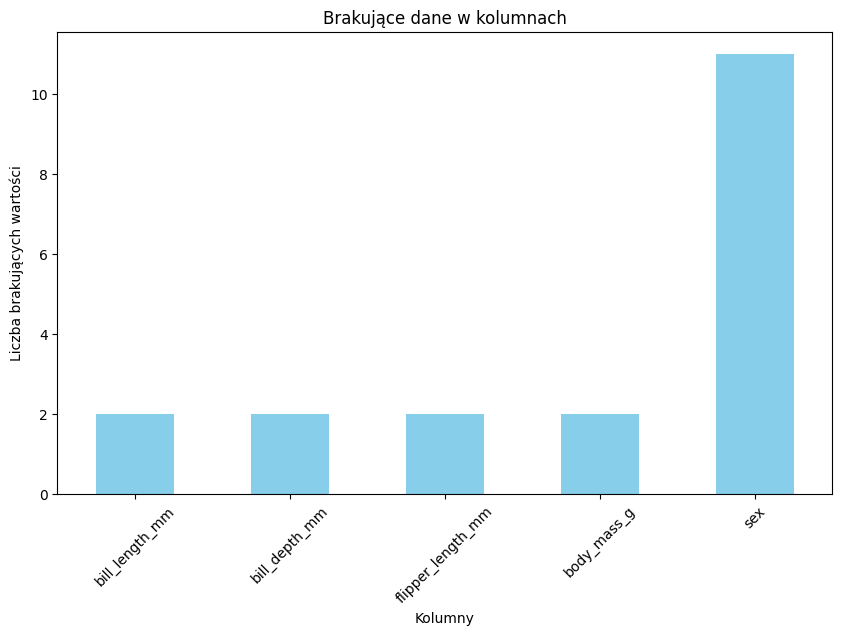

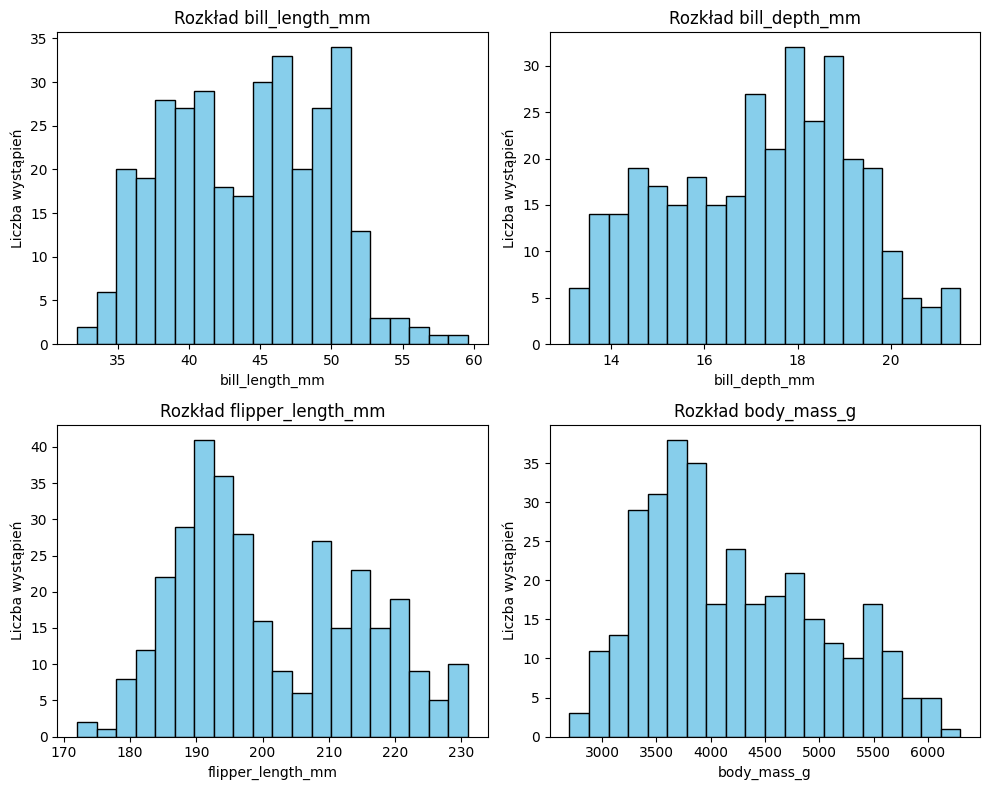

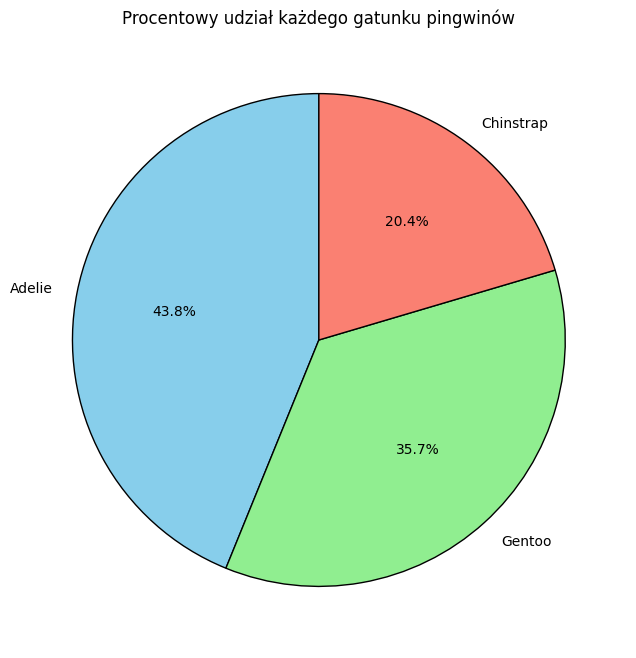

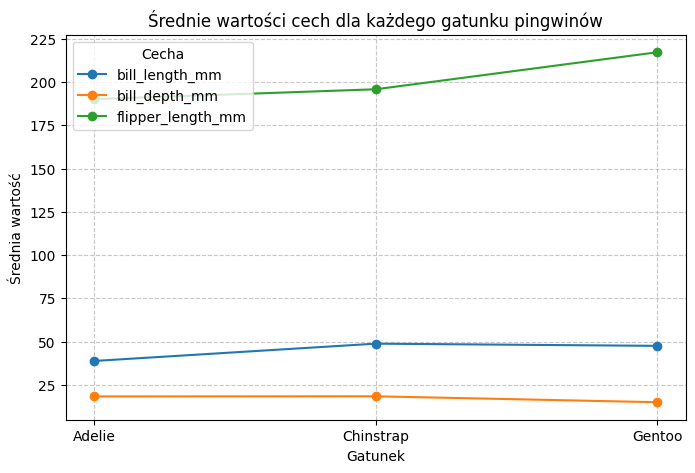

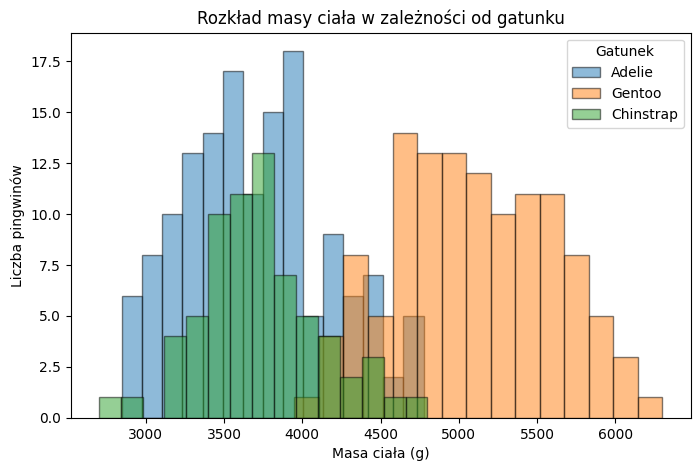

In [149]:
# Informacje podsumowujące dataset palmerpenguins
print(f"Usunięto następującą liczbę rekordów z brakującymi danymi: {deleted_na}")
plot_missing_data(missing_data)
numeric_data = ('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g')
penguins_numeric_data_plot(numeric_data, penguins)
penguins_species_count_plot()
penguins_species_attributes_plot()
penguins_species_weight_plot()

# Przygotowanie danych

**Wstępna obróbka danych:**

1) **Skalowanie cech numerycznych:** Użycie MinMaxScaler przekształca cechy do zakresu [0, 1], co przyspiesza i stabilizuje uczenie modelu.

2) **One-Hot Encoding:** Kategoryczne cechy zostały zakodowane na wektory binarne.

3) **Zmienne docelowe:** Zmienna docelowa została przekształcona przy pomocy LabelBinarizer co jest standardem w klasyfikacji wieloklasowej.

4) **Podział danych:** Train/Test Split: Zbiór danych podzielono na 80% treningowy i 20% testowy z zachowaniem proporcji klas, co zapewnia reprezentatywność danych w obu zbiorach.

5) **Brak zbioru walidacyjnego:** W tym przypadku, zbiór walidacyjny nie został oddzielony ponieważ liczba danych jest dosyć mała i sieć SOM  może być trenowana i oceniana na tym samym zbiorze testowym.

In [150]:
# Definicja cech numerycznych i kategorycznych
numerical = ('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g')
categorical = ['island', 'sex', 'year']

# Skalowanie cech numerycznych za pomocą MinMaxScaler
for cat in numerical:
    transformer = MinMaxScaler()
    transformer.fit(X[cat].values.reshape(-1, 1))
    X_transformed = pd.DataFrame(transformer.transform(X[cat].values.reshape(-1, 1)))
    X_transformed.columns = [f"{cat}_SCAL" for i in range(X_transformed.shape[1])]

    # Dołączanie nowych skalowanych cech do X i usuwanie oryginalnej kolumny
    X = pd.concat([X, X_transformed], axis=1)
    X.drop(cat, axis=1, inplace=True)

# One-Hot Encoding dla cech kategorycznych
for cat in categorical:
    transformer = OneHotEncoder(sparse_output=False)
    transformer.fit(X[cat].values.reshape(-1, 1))
    X_transformed = pd.DataFrame(transformer.transform(X[cat].values.reshape(-1, 1)))
    X_transformed.columns = [f"{cat}_{i+1}_OH" for i in range(X_transformed.shape[1])]

    # Dołączanie zakodowanych cech do X i usuwanie oryginalnej kolumny
    X = pd.concat([X, X_transformed], axis=1)
    X.drop(cat, axis=1, inplace=True)

# One-Hot Encoding dla zmiennej docelowej (y)
lb = LabelBinarizer()
y = lb.fit_transform(y)

In [151]:
# Podział danych na zestawy treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Zamiana one-hot encoding na etykiety klasowe
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Sprawdzenie rozkładu klas
print(Counter(y_train_labels), Counter(y_test_labels))
print(X_train.shape, X_test.shape)

Counter({0: 117, 2: 95, 1: 54}) Counter({0: 29, 2: 24, 1: 14})
(266, 12) (67, 12)


### Ostatecznie przekształcone dane z zestawu Palmer Penguins wyglądają następująco: ###

1) **Czyszczenie danych:** Usunięto wiersze z brakującymi danymi, co zmniejszyło liczbę obserwacji w zbiorze.
Kolumna docelowa species została oddzielona jako zmienna docelowa y, a pozostałe cechy (X) poddano dalszej obróbce.

2) **Skalowanie cech numerycznych:** Cechy ciągłe (bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g) zostały przeskalowane do zakresu [0, 1] za pomocą MinMaxScaler.
Nowe kolumny ze skalowanymi wartościami zostały oznaczone sufiksem _SCAL, np. bill_length_mm_SCAL.

3) **Kodowanie cech kategorycznych:** Zmieniono wartości kategoryczne (island, sex, year) na reprezentację One-Hot Encoding:
Każda unikalna wartość cechy kategorycznej została zamieniona na odrębne kolumny binarne. Na przykład island przyjęła postać island_1_OH, island_2_OH, i island_3_OH.

4) **Kodowanie zmiennej docelowej:** Zmienna species została zakodowana binarnie za pomocą LabelBinarizer (np. Adelie, Gentoo, Chinstrap reprezentowane jako macierz binarna).

5) **Podział na zbiory treningowy i testowy:** Dane zostały podzielone na:
Zbiór treningowy (80%) i testowy (20%).
Podział zachował proporcje klas (stratify=y).

In [152]:
# Nagłówek dla atrubutów treningu
X_train.head()

,bill_length_mm_SCAL,bill_depth_mm_SCAL,flipper_length_mm_SCAL,body_mass_g_SCAL,island_1_OH,island_2_OH,island_3_OH,sex_1_OH,sex_2_OH,year_1_OH,year_2_OH,year_3_OH
35,0.160000,0.583333,0.169492,0.125000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
327,0.494545,0.464286,0.389831,0.263889,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
97,0.207273,0.821429,0.305085,0.430556,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
230,0.410909,0.154762,0.779661,0.527778,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
149,0.650909,0.250000,0.779661,0.833333,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


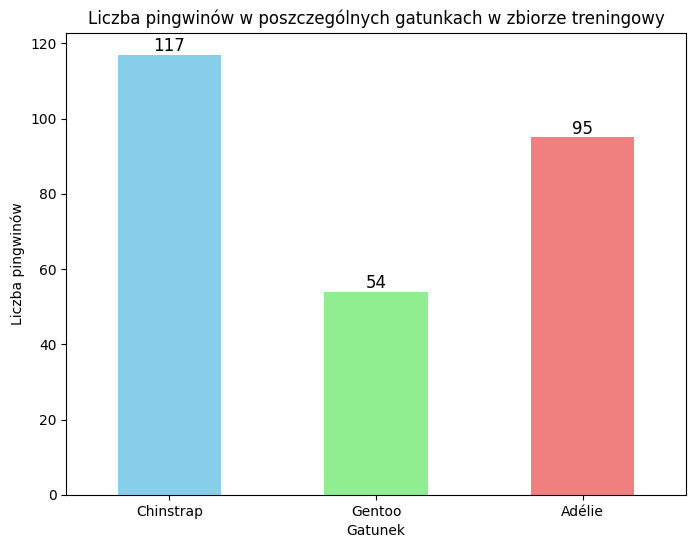

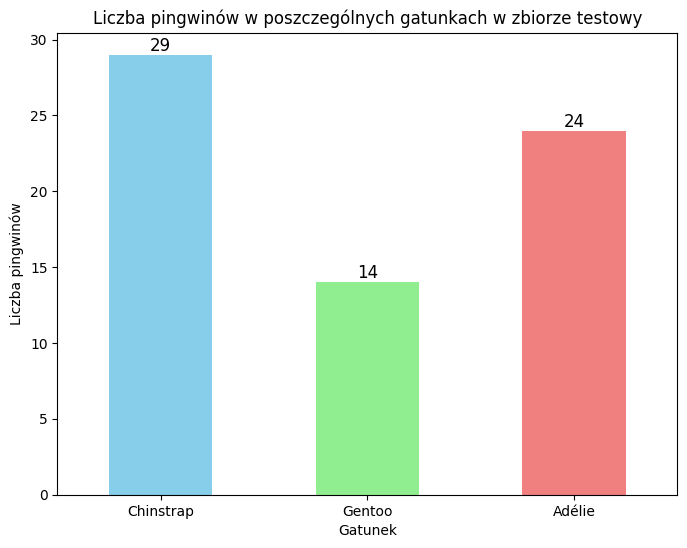

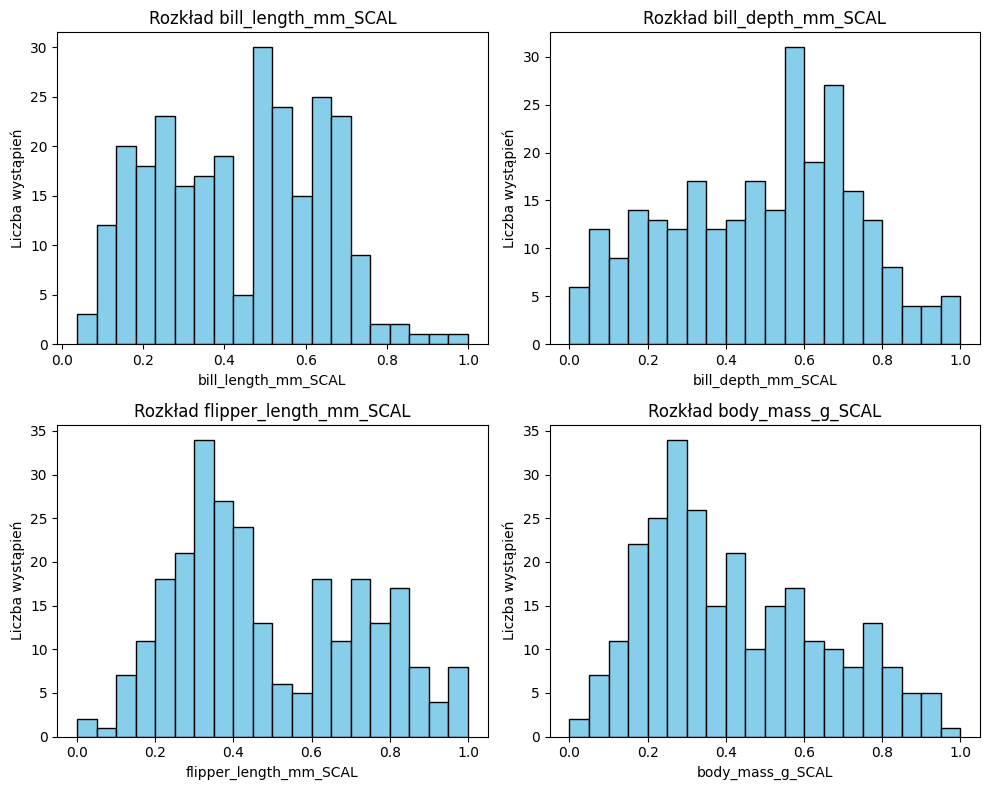

In [153]:
# Informacje podsumowujące podział dataset palmerpenguins do sieci
data_split_plot(y_train, 'treningowy')
data_split_plot(y_test, 'testowy')
numeric_data = ('bill_length_mm_SCAL', 'bill_depth_mm_SCAL', 'flipper_length_mm_SCAL', 'body_mass_g_SCAL')
penguins_numeric_data_plot(numeric_data, X_train)

## <span style="color:royalblue;">Sieć Neuronowa Typu SOM</span>

**n_neurons, m_neurons** - Liczba neuronów w poziomie i w pionie określa rozmiar dwuwymiarowej siatki SOM.
Wpływ na model:
Większa liczba neuronów pozwala lepiej odwzorowywać dane o dużej złożoności, ale zwiększa czas obliczeń.
Za mała liczba neuronów może skutkować niewystarczającym dopasowaniem do danych.

**iter** - Liczba iteracji w trakcie uczenia.
Wpływ na model:
Więcej iteracji pozwala sieci SOM lepiej dostosować się do danych.
Zbyt duża liczba iteracji może prowadzić do przeuczenia.

**sigma** - Określa, jak duży obszar wokół zwycięskiego neuronu jest aktualizowany podczas jednej iteracji.
Wpływ na model:
Zbyt duże sigma prowadzi do zbyt ogólnego modelu, a za małe — do nieodpowiedniego dopasowania.

**learning_rate** - Współczynnik uczenia określa wielkość zmiany wag neuronów podczas jednej iteracji.

Na początku ustawiam domyślne parametry ,które potem dostosuję


**Quantization error**- mierzy, jak dobrze neurony w mapie SOM odwzorowują dane wejściowe. Jest to średnia odległość między danymi wejściowymi a zwycięskimi neuronami

**Topographic error**- mierzy, jak dobrze struktura topologiczna mapy SOM odwzorowuje strukturalne relacje między danymi. Sprawdza on, czy dane o podobnych cechach są mapowane na neurony, które są blisko siebie

**Im mniejsze wartości obu tych błędów, tym lepiej SOM odwzorowuje dane i ich strukturę!**


In [154]:
# Liczba neuronów w sieci
n_neurons = 10
m_neurons = 10
iter = 1000
X_array = X_train.values

# Prosta sieć SOM z domyślnymi parametrami
som1 = MiniSom(n_neurons, m_neurons, input_len=X_array.shape[1], sigma=1.5, learning_rate=0.3)
som1.pca_weights_init(X_array)
som1.train_random(X_array, num_iteration=iter, verbose=True)

/usr/local/lib/python3.10/dist-packages/minisom.py:447: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.21722941928985554


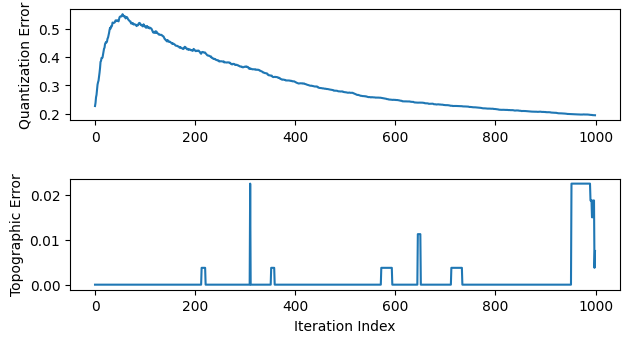

Topographic error: 0.007518796992481203

Classification Report (Simple SOM):
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        29
           1       0.86      0.86      0.86        14
           2       1.00      1.00      1.00        24

    accuracy                           0.94        67
   macro avg       0.93      0.93      0.93        67
weighted avg       0.94      0.94      0.94        67



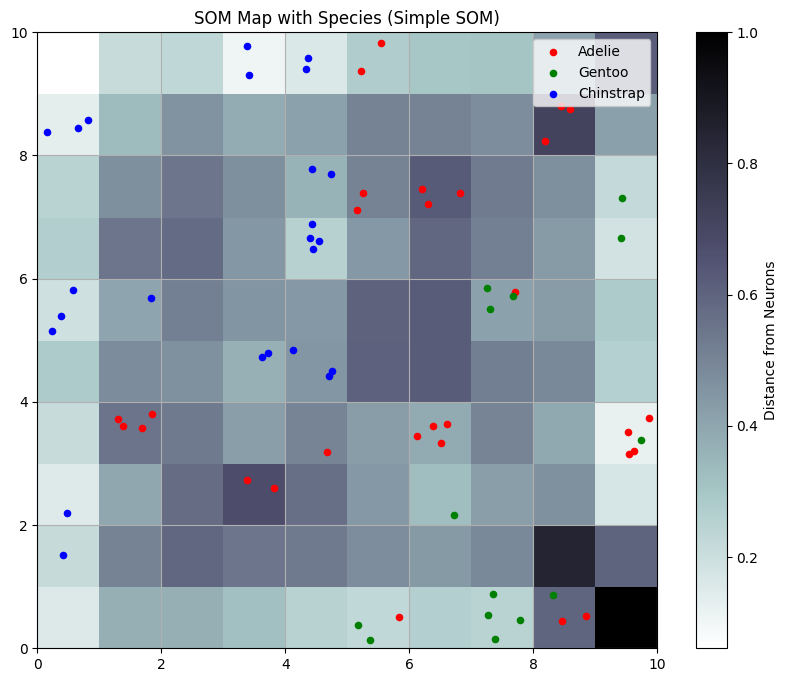

In [155]:
# Działanie i podsumowanie podstawowego modelu
y_pred1 = summary_SOM(som1, "(Simple SOM)", iter, X_array, X_test, y_test_labels)

W **Classification Report** znajdują się metryki oceny skuteczności modelu klasyfikacyjnego, takie jak precision, recall, f1-score oraz accuracy. Dla każdej klasy (czyli gatunków pingwinów) te metryki są obliczane, a następnie obliczane są średnie dla całego modelu (w tym accuracy, macro avg i weighted avg).

**Precision, recall, f1-score** dla każdej klasy wynoszą około:

0.93 dla klasy 0

0.86 dla klasy 1

1.00 dla klasy 2.

Accuracy = 94% oznacza, że sieć SOM dobrze klasyfikuje dane, ale nie osiąga perfekcji, zwłaszcza dla klasy 1, gdzie precision i recall są niższe.

## <span style="color:royalblue;">Dostrajanie Parametrów</span>

In [156]:
# Liczba neuronów w sieci
n_neurons = 30
m_neurons = 30
iter = 5000

# Trening drugiej sieci z dostrojonymi parametrami
som2 = MiniSom(n_neurons, m_neurons, input_len=X_array.shape[1], sigma=3, learning_rate=0.2)
som2.pca_weights_init(X_array)
som2.train_random(X_array, num_iteration=iter, verbose=True)

/usr/local/lib/python3.10/dist-packages/minisom.py:447: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.09613716314167525


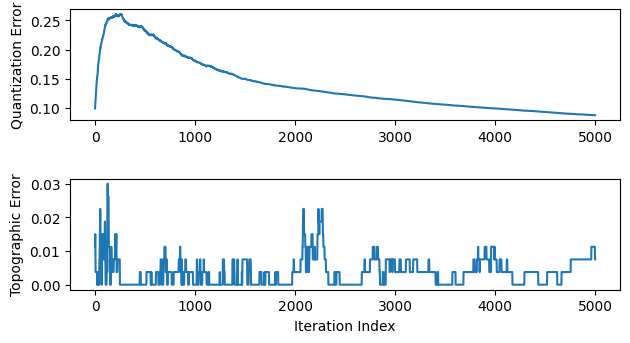

Topographic error: 0.007518796992481203

Classification Report (Tuned SOM):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



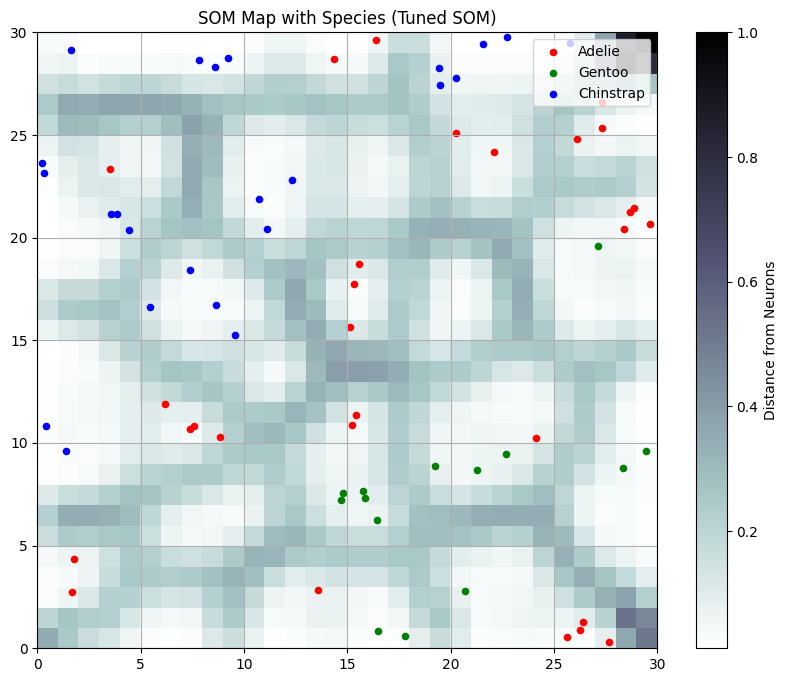

In [157]:
# Działanie i podsumowanie modelu z dostosowanymi parametrami
y_pred2 = summary_SOM(som2, '(Tuned SOM)', iter, X_array, X_test, y_test_labels)

Dostrojenie Parametrów:

**Większa liczba neuronów (30x30)**: Umożliwiła dokładniejsze odwzorowanie danych, poprawiając jakość mapy.

**Więcej iteracji (5000)**: Dało sieci więcej czasu na naukę, co pozwoliło na lepsze dopasowanie.

**Wyższe sigma (3.0)**: Zwiększyło zakres aktualizacji neuronów, co poprawiło uchwycenie globalnych wzorców.

**Niższy learning rate (0.2)**: Spowolnił proces uczenia, umożliwiając precyzyjniejsze dostosowanie wag i uniknięcie niestabilności.

Model uzyskał 100% dokładności  co oznacza  że sieć idealnie sklasyfikowała wszystkie próbki.

*Quantization error* spadł do 0.09613716314167525, co oznacza, że sieć lepiej dopasowała swoje neurony do danych, redukując różnice między danymi wejściowymi a reprezentacjami neuronów.

*Topographic error* = 0.007518796992481203:

Dobre odwzorowanie topografii danych.

*Classification Report*:

Precision, Recall, F1-score dla każdej klasy (0, 1, 2) wynoszą 1.00, co oznacza, że model doskonale klasyfikuje wszystkie dane, przypisując odpowiednią klasę bez żadnych błędów.
Accuracy = 1.00: Model uzyskał 100% dokładności, co oznacza, że każda próbka została prawidłowo sklasyfikowana.

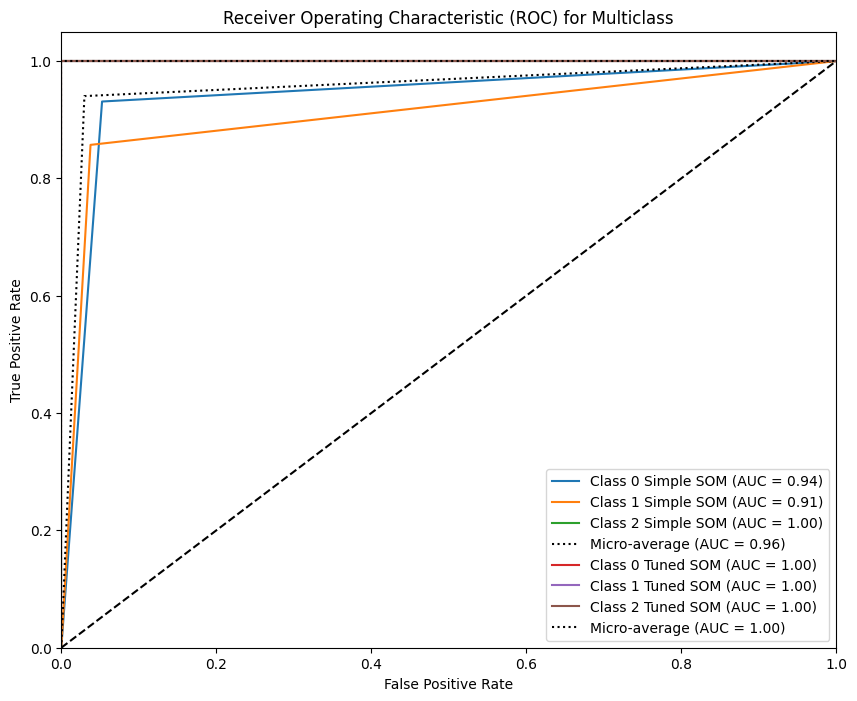

In [158]:
# Binarizacja etykiet dla ROC
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test_labels)
y_pred_prob1 = lb.transform(y_pred1)
y_pred_prob2 = lb.transform(y_pred2)

# Wyświetlanie ROC dla obu modeli
plot_summaru_roc_SOM(y_test_bin, y_pred_prob1, y_pred_prob2)

Jak widać dokładność dla modelu niedostrojonego i dostrojonego osiągają wartości 0,91 - 1 , więc sieć neuronowa SOM radzi sobie świetnie z rozróżnianiem poszczególnych gatunków pingwinów.

# Podsumowanie

1. Model niedostrojony:

Quantization Error: 0.21722941928985554

Topographic Error: 0.007518796992481203

Dokładność klasyfikacji: Osiągnięta dokładność wskazuje na skuteczną segmentację gatunków pingwinów przez model, mimo że parametry zostały pozostawione na poziomie domyślnym. Model zidentyfikował cechy poszczególnych gatunków pingwinów, przy czym najtrudniej klasyfikowano gatunek Gentoo a najłatwiej Chinstrap.

2. Model dostrojony:

Quantization Error: 0.09613716314167525

Topographic Error: 0.007518796992481203

Dokładność klasyfikacji: Model dostrojony uzyskał 100% dokładności, co oznacza, że skutecznie rozróżniał wszystkie gatunki pingwinów. Zmiany w parametrach, takie jak zmniejszenie wartości sigma oraz dostosowanie współczynnika uczenia, pomogły sieci lepiej odwzorować dane i uzyskać wyższą precyzję w klasyfikacji.

3. Wykres ROC:
Wyniki analizy krzywej ROC potwierdzają wysoką jakość modelu. Zarówno w przypadku modelu niedostrojonego, jak i dostrojonego, wartości AUC (Area Under the Curve) są bardzo wysokie (bliskie 1), co wskazuje na świetną zdolność modelu do rozróżniania klas (gatunków pingwinów). Krzywa ROC dla każdej klasy (Adelie, Gentoo, Chinstrap) przebiega niemal idealnie, co potwierdza, że model SOM jest skuteczny w zadaniu klasyfikacyjnym.

4. Wnioski:

SOM jako narzędzie do klasyfikacji: Sieć SOM okazała się bardzo skutecznym narzędziem do klasyfikacji gatunków pingwinów na podstawie cech fizycznych, takich jak długość dzioba, głębokość dzioba czy długość płetwy.
Dostrajanie parametrów: Choć model niedostrojony już osiągnął solidne wyniki, proces dostrajania parametrów (takich jak sigma, learning_rate i liczba neuronów) pozwolił na znaczną poprawę wyników, co przełożyło się na osiągnięcie 100% dokładności.
